# Visualization

Importing the required packages.

In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Import data from the file. Get the summary of data.

In [4]:
data = pd.read_csv('PSID.csv')
#make married colom categorical
data['married'] = pd.Categorical(data['married'])
data.describe()

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids
count,4856.000000,4856.000000,4856.000000,4856.000000,4855.000000,4856.000000,4856.000000,4856.000000
mean,2428.500000,4598.101318,59.213550,38.462932,16.377137,14244.506178,1235.334843,4.481260
std,1401.950784,2761.971174,79.748556,5.595116,18.449502,15985.447449,947.175837,14.887856
min,1.000000,4.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,1214.750000,1905.000000,2.000000,34.000000,12.000000,85.000000,32.000000,1.000000
50%,2428.500000,5464.000000,4.000000,38.000000,12.000000,11000.000000,1517.000000,2.000000
75%,3642.250000,6655.000000,170.000000,43.000000,14.000000,22000.000000,2000.000000,3.000000
max,4856.000000,9306.000000,205.000000,50.000000,99.000000,240000.000000,5160.000000,99.000000


Draw one box plot diagram for each data variable.

BoxPlot on age

<Figure size 28800x28800 with 0 Axes>

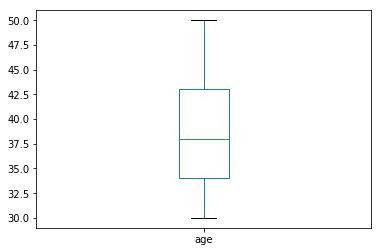

In [7]:
plt.figure(figsize=(400,400))
data.plot.box(y='age')
plt.show()

BoxPlot on educatn

<Figure size 28800x28800 with 0 Axes>

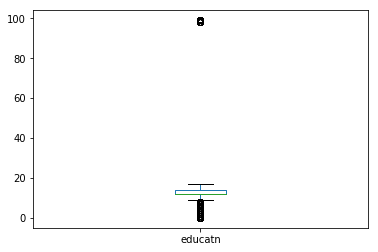

In [11]:
plt.figure(figsize=(400,400))
data.plot.box(y='educatn')
plt.show()

BoxPlot on earnings

<Figure size 28800x28800 with 0 Axes>

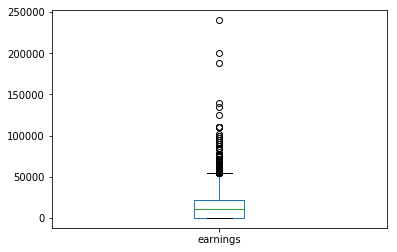

In [12]:
plt.figure(figsize=(400,400))
data.plot.box(y='earnings')
plt.show()

BoxPlot on hours

<Figure size 28800x28800 with 0 Axes>

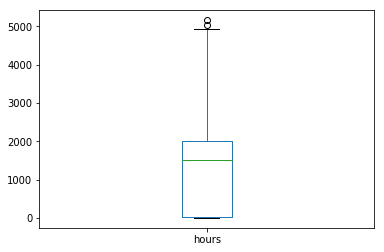

In [13]:
plt.figure(figsize=(400,400))
data.plot.box(y='hours')
plt.show()

BoxPlot on kids

<Figure size 28800x28800 with 0 Axes>

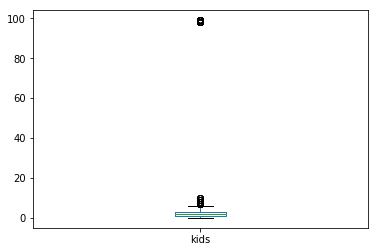

In [15]:
plt.figure(figsize=(400,400))
data.plot.box(y='kids')
plt.show()

We can clearly see that kids and education has outliers with huge deviation from other data. Dataset also be cleaned by limiting ernings and hours.

Maximum anual work hours of a person is assumed 360*12 = 4320

Maximum number of kids per person and maximum education level is assumed to 20.

Minimum value is assumed to 0.

# Removing outliers

In [16]:
processedData = data[data.kids < 20]
processedData = processedData[processedData.educatn < 20]
processedData = processedData[processedData.hours <= 4320]
processedData.describe()

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,2400.954656,4544.440389,57.412962,38.403672,12.457200,14484.756470,1246.925238,2.151736
std,1399.862101,2759.827552,78.935097,5.531733,2.913805,16063.257705,927.525824,1.424960
min,1.000000,4.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,1184.000000,1850.000000,2.000000,34.000000,12.000000,400.000000,98.000000,1.000000
50%,2393.000000,5437.000000,4.000000,38.000000,12.000000,11235.000000,1530.000000,2.000000
75%,3608.000000,6616.000000,170.000000,43.000000,14.000000,22508.000000,2000.000000,3.000000
max,4856.000000,9306.000000,200.000000,50.000000,17.000000,240000.000000,4233.000000,10.000000


# Correlation

In [17]:
processedData.corr(method ='pearson')

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids
Seq No,1.000000,0.984751,-0.271181,-0.018843,-0.346650,-0.185766,-0.124131,0.148645
intnum,0.984751,1.000000,-0.266726,-0.031094,-0.343687,-0.187155,-0.122750,0.150078
persnum,-0.271181,-0.266726,1.000000,-0.086206,0.131315,0.052544,0.036722,-0.073391
age,-0.018843,-0.031094,-0.086206,1.000000,-0.022543,0.091997,0.056327,0.146513
educatn,-0.346650,-0.343687,0.131315,-0.022543,1.000000,0.379543,0.238087,-0.270824
earnings,-0.185766,-0.187155,0.052544,0.091997,0.379543,1.000000,0.633752,-0.247086
hours,-0.124131,-0.122750,0.036722,0.056327,0.238087,0.633752,1.000000,-0.190789
kids,0.148645,0.150078,-0.073391,0.146513,-0.270824,-0.247086,-0.190789,1.000000


Since Seq No and intnum is ignored, We can see 0.379543 correlation between earnings and education, 0.633752 correlation between hours and earnings.

# Hypothesis

1. Annual work hours has positive impact on earnings.
2. Education has positive impact on earnings.

## Hypothesis 1

### Annual work hours has positive impact on earnings

If correlation is C,
Null Hypothesis, H0: C = 0;
Alternative Hypothesis Ha: C > 0

From the above table correlation between work hours and earnings is 0.633752. Therefore, There is insufficient evidence, to conclude that the annual work hours has no impact on earnings. Therefore, we can conclude that annual work hours has positive impact on earnings.

## Hypothesis 2 

### Education has positive impact on earnings.

If correlation is C, Null Hypothesis, H0: C = 0; Alternative Hypothesis Ha: C > 0

From the above table correlation between education and earnings is 0.379543. Therefore, There is insufficient evidence, to conclude that the education has no impact on earnings. Therefore, we can conclude that education has positive impact on earnings.